C:\ProgramData\Anaconda3\lib\site-packages\openpnm\io\Statoil.py:62: FutureWarning: read_table is deprecated, use read_csv instead.
  index_col=0)
C:\ProgramData\Anaconda3\lib\site-packages\openpnm\io\Statoil.py:79: FutureWarning: read_table is deprecated, use read_csv instead.
  index_col=0)
C:\ProgramData\Anaconda3\lib\site-packages\openpnm\io\Statoil.py:120: FutureWarning: read_table is deprecated, use read_csv instead.
  index_col=0)


sample
Number of pores before trimming 185
Porosity before trimming = 0.03560792517933492
Trimming removes the unconnected pores.
Number of pores after trimming: 173
Porosity before trimming = 0.03209799937016645
Maximum pore radius = 5.446481e-07m
Minimum pore radius = 2.6883040000000003e-07m
Maximum throat radius = 4.3364020000000005e-07m
Minimum throat radius = 6.8327e-08m
Maximum throat length = 1.0451199999999999e-05m
Minimum throat length = 2.466302e-07m


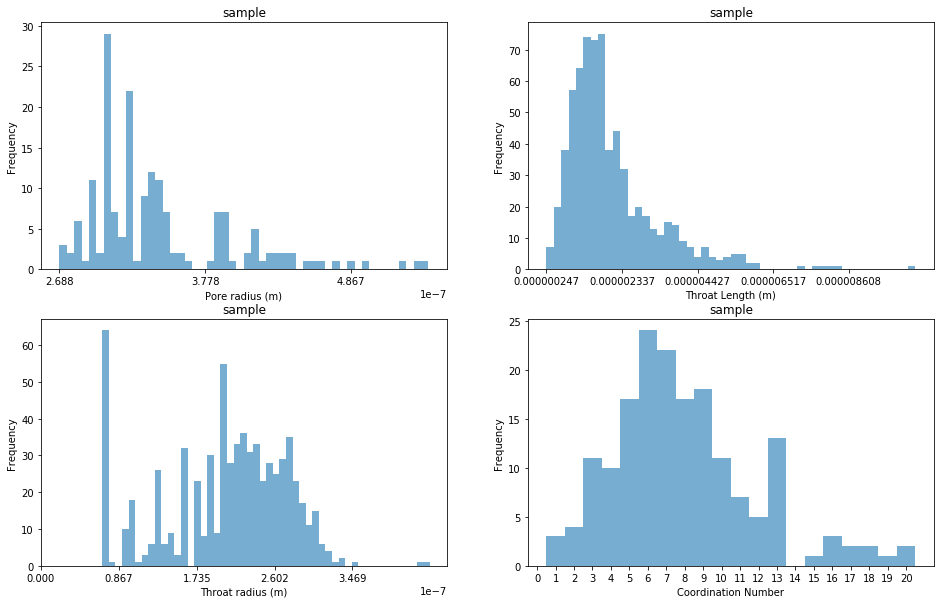

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import openpnm as op
import pandas as pd

foldername = 'sample'

from pathlib import Path
#path = 'D:\\ARV\\Dissertation\\Pore Network Modeling\\Synthetic Networks\\'+foldername
#path = 'D:\\ARV\\Dissertation\\Desktop\\Pore Network Modeling\\Micro CT image\\pnextract-master\\pnextract-master\\bin\\'+foldername
path = 'D:\\ARV\\Dissertation\\Desktop\\Pore Network Modeling\\Micro CT image\\pnextract-master\\pnextract-master\\bin\\'+foldername
path = Path(path)
path = Path(path)
project = op.io.Statoil.load(path=path, prefix=foldername)
pn = project.network
pn.name = foldername
project.export_data(filename=pn.name)
print(foldername)
print('Number of pores before trimming',pn.Np)
print('Porosity before trimming = '+str((sum(pn['throat.volume'])+sum(pn['pore.volume']))/((0.00000013888889*300)**3)))
h = pn.check_network_health()
print('Trimming removes the unconnected pores.')
op.topotools.trim(network=pn,pores=h['trim_pores'])
print('Number of pores after trimming:',pn.Np)
print('Porosity before trimming = '+str((sum(pn['throat.volume'])+sum(pn['pore.volume']))/((0.00000013888889*300)**3)))
print('=====================================================================')
print('Maximum pore radius = '+str(max(pn['pore.radius']))+'m')
print('Minimum pore radius = '+str(min(pn['pore.radius']))+'m')
print('Maximum throat radius = '+str(max(pn['throat.radius']))+'m')
print('Minimum throat radius = '+str(min(pn['throat.radius']))+'m')
print('Maximum throat length = '+str(max(pn['throat.length']))+'m')
print('Minimum throat length = '+str(min(pn['throat.length']))+'m')
    
plt.figure(figsize=(16,10))
plt.subplot(221)
fig1 = plt.hist(pn['pore.radius'],bins = 50, alpha = 0.6)
pr_min = min(pn['pore.radius'])
pr_max = max(pn['pore.radius'])
#pr_max = pr_max+1/pr_max
plt.xticks(np.arange(pr_min,pr_max,step = pr_max/5))
plt.xlabel('Pore radius (m)')
plt.ylabel('Frequency')
plt.title(foldername)
plt.savefig(pn.name+'_Pore_radius.png')
#plt.show(fig1)

plt.subplot(222)   
fig2 = plt.hist(pn['throat.length'],bins = 50, alpha = 0.6)
thl_min = min(pn['throat.length'])
thl_max = max(pn['throat.length'])
plt.xticks(np.arange(thl_min,thl_max,step = thl_max/5))
plt.xlabel('Throat Length (m)')
plt.ylabel('Frequency')
plt.title(foldername)
plt.savefig(pn.name+'_throat_length.png')
#plt.show(fig2)



plt.subplot(223)
fig3 = plt.hist(pn['throat.radius'],bins = 50, alpha = 0.6)  # pn=network name
th_max = max(pn['throat.radius'])
plt.xticks(np.arange(0,th_max,step = th_max/5))
plt.xlabel('Throat radius (m)')
plt.ylabel('Frequency')
plt.title(foldername)
plt.savefig(pn.name+'_throat_radius.png')
#plt.show(fig3)


cn = np.arange(0,pn.Np)
for i in np.arange(0,pn.Np):
    cn[i] = pn.num_neighbors(i)

cn_max = max(cn)

plt.subplot(224)
fig4 = plt.hist(cn,bins = cn_max-1, alpha = 0.6, align='left')
plt.xticks(np.arange(0,cn_max,step = 1))
plt.xlabel('Coordination Number')
plt.ylabel('Frequency')
plt.title(foldername)
plt.savefig(pn.name+'_Coordination_number.png')
#plt.show(fig4)
    